In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import io
import base64

match = pd.read_json('./data/match.json')
team = pd.read_csv('./data/team.csv')
team_attr = pd.read_csv('./data/team_attr.csv')
team_attr = pd.merge(team_attr, team, left_on='team_api_id',
                     right_on='team_api_id')


def match_viz(match_select):
    spec_match = match[match['match_api_id'] == match_select]
    home = spec_match['home_team_api_id']
    away = spec_match['away_team_api_id']
    home_attr = team_attr[team_attr['team_api_id'] == home.item()]
    home_attr = home_attr.head(1)
    away_attr = team_attr[team_attr['team_api_id'] == away.item()]
    away_attr = away_attr.head(1)
    f_s_attr = home_attr.append(away_attr)
    f_s_attr1 = f_s_attr[['buildUpPlaySpeed', 'buildUpPlayPassing',
                          'chanceCreationPassing', 'chanceCreationShooting', 'chanceCreationCrossing',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']]
    f_s_attr1 = f_s_attr1.set_index(f_s_attr['team_long_name'])
    N = len(f_s_attr1.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #ax.xticks(angles[:-1], f_s_attr1.columns)
    ax.set_xticks((angles[:-1],f_s_attr1.columns), minor=False)
    ax.set_rlabel_position(0)
    ax.yticks([10, 20, 30, 40, 50, 60, 70], ["10", "20", "30",
                                              "40", "50", "60", "70"], color="grey", size=7)
    fig.ylim(0, 75)
    values = f_s_attr1.loc[f_s_attr1.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)
    values = f_s_attr1.loc[f_s_attr1.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)
    buf = io.BytesIO()
    fig.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    fig.show()


match_viz(1980062)


TypeError: '<' not supported between instances of 'str' and 'float'

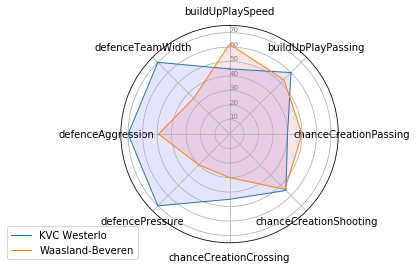

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import io
import base64

match = pd.read_json('data/match.json')
team = pd.read_csv('data/team.csv')
team_attr = pd.read_csv('data/team_attr.csv')
team_attr = pd.merge(team_attr, team, left_on='team_api_id',
                     right_on='team_api_id')


def match_viz(match_select):
    spec_match = match[match['match_api_id'] == match_select]
    home = spec_match['home_team_api_id']
    away = spec_match['away_team_api_id']
    home_attr = team_attr[team_attr['team_api_id'] == home.item()]
    home_attr = home_attr.head(1)
    away_attr = team_attr[team_attr['team_api_id'] == away.item()]
    away_attr = away_attr.head(1)
    f_s_attr = home_attr.append(away_attr)
    f_s_attr1 = f_s_attr[['buildUpPlaySpeed', 'buildUpPlayPassing',
                          'chanceCreationPassing', 'chanceCreationShooting', 'chanceCreationCrossing',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']]
    f_s_attr1 = f_s_attr1.set_index(f_s_attr['team_long_name'])
    N = len(f_s_attr1.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], f_s_attr1.columns)
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70], ["10", "20", "30",
                                              "40", "50", "60", "70"], color="grey", size=7)
    plt.ylim(0, 75)
    values = f_s_attr1.loc[f_s_attr1.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)
    values = f_s_attr1.loc[f_s_attr1.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)
    buf = io.BytesIO()
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    buf = io.BytesIO()
    plt.savefig(buf,format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    header, encoded = img_str.split(",", 1)
    data = base64.b64decode(encoded)
    with open("./imageToSave.png", "wb") as fh:
        fh.write(data)
        #fh.write(base64.decodebytes(data))


match_viz(1980062)


<class 'numpy.datetime64'>


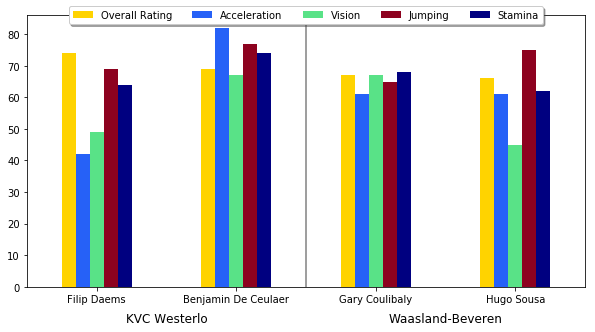

In [34]:
import pandas as pd
import numpy as np
import math
import io
import base64


player_df = pd.read_csv('data/player.csv')
player_attr_df = pd.read_csv('data/player_attr_1.csv')
team_attr_df = pd.read_csv('data/team_attr.csv')
team_df = pd.read_csv('data/team.csv')

match_df = pd.read_json('data/match.json')


player_full_df = pd.merge(player_df, player_attr_df, on="player_api_id")
player_full_df = player_full_df.drop(columns=["id_x", "id_y", "player_fifa_api_id_y"])
player_full_df = player_full_df.rename({"player_fifa_api_id_x" : "player_fifa_api_id"}, axis="columns")


def match_compare_players(match_id):
    
    match_row = match_df[match_df["match_api_id"] == match_id]
    
    match_date = match_row["date"].values[0]
    match_players_home = np.round(match_row[match_row.columns[55:66]].values.astype(np.double)).astype(int)[0]
    match_players_away = np.round(match_row[match_row.columns[66:77]].values.astype(np.double)).astype(int)[0]

    top_home_df = pd.DataFrame(columns=player_full_df.columns)

    for player_id in match_players_home:
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        top_home_df = top_home_df.append(player)

    top_home_df = top_home_df.sort_values(by=["overall_rating"], ascending=False)
    top_home_ids = top_home_df["player_api_id"].head(2).values

    top_away_df = pd.DataFrame(columns=player_full_df.columns)

    for player_id in match_players_away:
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        top_away_df = top_away_df.append(player)

    top_away_df = top_away_df.sort_values(by=["overall_rating"], ascending=False)
    top_away_ids = top_away_df["player_api_id"].head(2).values
    
    top_ids = np.concatenate((top_home_ids, top_away_ids), axis=None)
    
    player_index = []
    overall_rating = []
    acceleration = []
    vision = []
    jumping = []
    stamina = []
    
    for player_id in top_ids:
        
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        
        player_index.append(player["player_name"].values[0])
        overall_rating.append(player["overall_rating"].values[0])
        acceleration.append(player["acceleration"].values[0])
        vision.append(player["vision"].values[0])
        jumping.append(player["jumping"].values[0])
        stamina.append(player["stamina"].values[0])
        
    player_stat_df = pd.DataFrame({"Overall Rating": overall_rating, "Acceleration": acceleration, "Vision": vision, "Jumping": jumping, "Stamina": stamina},index=player_index)
    compare_vis = player_stat_df.plot.bar(rot=0, figsize=(10, 5), color={"#59E287", "#FFD300", "#8D021F", "#000080", "#2661F7"})
    
    compare_vis.axvline(x=1.5, color="grey")
    
    compare_vis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)
    
    home_name = team_df[team_df["team_api_id"] == match_row["home_team_api_id"].values[0]]["team_long_name"].values[0]
    away_name = team_df[team_df["team_api_id"] == match_row["away_team_api_id"].values[0]]["team_long_name"].values[0]
    
    compare_vis.text(0.5, -10, home_name, horizontalalignment='center', verticalalignment='center', fontsize=12)
    compare_vis.text(2.5, -10, away_name, horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    fig = compare_vis.get_figure()
    buf = io.BytesIO()
    fig.savefig(buf,format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    header, encoded = img_str.split(",", 1)
    data = base64.b64decode(encoded)
    with open("./joseph.png", "wb") as fh:
        fh.write(data)

match_compare_players(1980062)